In [1]:
import serial
import matplotlib.pyplot as plt

# Configure the serial connection
arduino_port = 'COM3'  # Replace with the correct port
baud_rate = 9600
ser = serial.Serial(arduino_port, baud_rate)

# Variables to store the data
moisture_values = []
light_values = []

# Read data from Arduino and plot the graphs
try:
    while True:
        # Read a line of data from the Arduino
        line = ser.readline().decode().strip()

        # Extract moisture and light values from the line
        moisture, light = line.split("\t")
        moisture_values.append(int(moisture.split(":")[1]))
        light_values.append(int(light.split(":")[1]))

        # Plot the graphs
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.plot(moisture_values, 'r')
        plt.ylabel('Moisture')
        plt.subplot(2, 1, 2)
        plt.plot(light_values, 'b')
        plt.ylabel('Light')
        plt.xlabel('Time')
        plt.show(block=False)
        plt.pause(0.1)
except KeyboardInterrupt:
    ser.close()
    print('Serial connection closed.')


SerialException: could not open port 'COM3': PermissionError(13, 'Access is denied.', None, 5)

In [2]:
import serial
import sqlite3
import matplotlib.pyplot as plt
import time

# Configure the serial connection
arduino_port = 'COM3'  # Replace with the correct port
baud_rate = 9600
ser = serial.Serial(arduino_port, baud_rate)

# Connect to the SQLite database
conn = sqlite3.connect('sensor_data.db')
c = conn.cursor()

# Create the table if it doesn't exist
c.execute('''CREATE TABLE IF NOT EXISTS sensor_data
             (timestamp DATETIME, moisture INT, light INT)''')

# Variables to store the data
moisture_values = []
light_values = []

# Read data from Arduino and insert into the database
start_time = time.time()
while True:
    # Read a line of data from the Arduino
    line = ser.readline().decode().strip()

    # Extract moisture and light values from the line
    moisture, light = line.split("\t")
    moisture_value = int(moisture.split(":")[1])
    light_value = int(light.split(":")[1])

    # Insert data into the database
    current_time = time.strftime('%Y-%m-%d %H:%M:%S')
    c.execute("INSERT INTO sensor_data VALUES (?, ?, ?)", (current_time, moisture_value, light_value))
    conn.commit()

    # Append values to the lists
    moisture_values.append(moisture_value)
    light_values.append(light_value)

    # Check if 200 seconds have passed
    elapsed_time = time.time() - start_time
    if elapsed_time >= 200:
        break

    time.sleep(1)  # Wait for 1 second

ser.close()
conn.close()
print('Serial connection and database connection closed.')

# Plot the graph from the database
conn = sqlite3.connect('sensor_data.db')
c = conn.cursor()
c.execute("SELECT timestamp, moisture, light FROM sensor_data")
data = c.fetchall()
conn.close()

timestamps = [row[0] for row in data]
moisture_values = [row[1] for row in data]
light_values = [row[2] for row in data]

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(timestamps, moisture_values, 'r')
plt.ylabel('Moisture')

plt.subplot(2, 1, 2)
plt.plot(timestamps, light_values, 'b')
plt.ylabel('Light')
plt.xlabel('Timestamp')

plt.show()


SerialException: could not open port 'COM3': PermissionError(13, 'Access is denied.', None, 5)

In [ ]:
data

In [ ]:
import pandas as pd
columns = ['timestamp', 'moisture', 'light']
df = pd.DataFrame(data, columns=columns)

In [ ]:
df

In [ ]:
import pandas as pd

# Save DataFrame as CSV
file_path = r'E:\Plant\sensor_data.csv'
df.to_csv(file_path, index=False)



In [8]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path and name
df = pd.read_csv(r'E:\Plant\sensor_data.csv')

print(df)


               timestamp  moisture  light
0    2023-05-26 18:30:28      1023    819
1    2023-05-26 18:30:29      1021    805
2    2023-05-26 18:30:30      1023    817
3    2023-05-26 18:30:31      1021    807
4    2023-05-26 18:30:32      1021    813
..                   ...       ...    ...
373  2023-05-26 22:28:04      1023    875
374  2023-05-26 22:28:05      1023    878
375  2023-05-26 22:28:06      1022    878
376  2023-05-26 22:28:07      1022    875
377  2023-05-26 22:28:08      1022    872

[378 rows x 3 columns]


In [9]:
df

,timestamp,moisture,light
0,2023-05-26 18:30:28,1023,819
1,2023-05-26 18:30:29,1021,805
2,2023-05-26 18:30:30,1023,817
3,2023-05-26 18:30:31,1021,807
4,2023-05-26 18:30:32,1021,813
...,...,...,...
373,2023-05-26 22:28:04,1023,875
374,2023-05-26 22:28:05,1023,878
375,2023-05-26 22:28:06,1022,878
376,2023-05-26 22:28:07,1022,875


## Using Pywhatkit to send instantly

In [4]:
import pywhatkit as pwk
import pandas as pd

# Load the dataframe
df = pd.read_csv(r'E:\Plant\sensor_data.csv')


if (df['moisture'] == 1000).any() and (df['moisture'] > 1022).any():
    # Specify the phone number and message
    phone_number = "+919990091106"
    message = "Moisture alert! The moisture value of 1023 is greater than 1022!"

    
    # Send the WhatsApp message instantly
    pwk.sendwhatmsg_instantly(phone_number, message)
    print('WhatsApp message sent successfully.')


WhatsApp message sent successfully.


In [6]:
import pywhatkit as pwk
import pandas as pd

# Load the dataframe
df = pd.read_csv(r'E:\Plant\sensor_data.csv')

# Check if moisture value of 1023 is greater than 1022
if (df['moisture'] == 1023).any() and (df['moisture'] > 1022).any():
    # Specify the phone number and message
    phone_number = "+919990091106"
    message = "Moisture alert! The moisture value of 1023 is greater than 1022!"

    # Send the WhatsApp message instantly
    pwk.sendwhatmsg_instantly(phone_number, message)
    print('WhatsApp message sent successfully.')


WhatsApp message sent successfully.


In [10]:
import pandas as pd

# Reduce moisture by 1024 and take absolute value
df['moisture'] = df['moisture'].sub(1024).abs()

# Reduce light by 900
df['light'] = df['light'].sub(900).abs()

# Display the updated dataframe
print(df)


               timestamp  moisture  light
0    2023-05-26 18:30:28         1     81
1    2023-05-26 18:30:29         3     95
2    2023-05-26 18:30:30         1     83
3    2023-05-26 18:30:31         3     93
4    2023-05-26 18:30:32         3     87
..                   ...       ...    ...
373  2023-05-26 22:28:04         1     25
374  2023-05-26 22:28:05         1     22
375  2023-05-26 22:28:06         2     22
376  2023-05-26 22:28:07         2     25
377  2023-05-26 22:28:08         2     28

[378 rows x 3 columns]


In [13]:
df

,timestamp,moisture,light
0,2023-05-26 18:30:28,1,81
1,2023-05-26 18:30:29,3,95
2,2023-05-26 18:30:30,1,83
3,2023-05-26 18:30:31,3,93
4,2023-05-26 18:30:32,3,87
...,...,...,...
373,2023-05-26 22:28:04,1,25
374,2023-05-26 22:28:05,1,22
375,2023-05-26 22:28:06,2,22
376,2023-05-26 22:28:07,2,25


In [14]:
df['moisture'].max()

271

In [15]:
df['light'].max()

517

## Visulalize

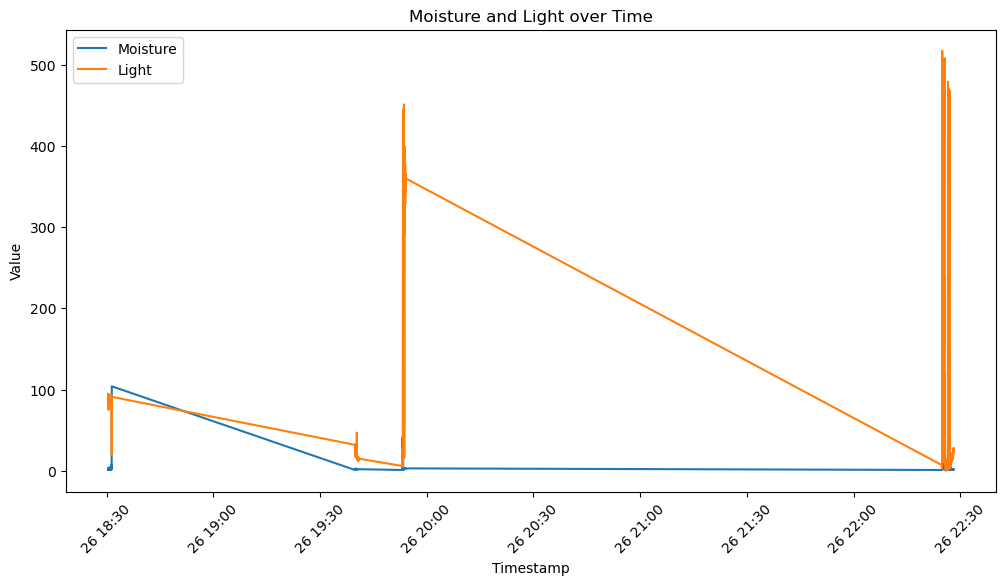

In [16]:
import matplotlib.pyplot as plt

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['moisture'], label='Moisture')
plt.plot(df['timestamp'], df['light'], label='Light')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Moisture and Light over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


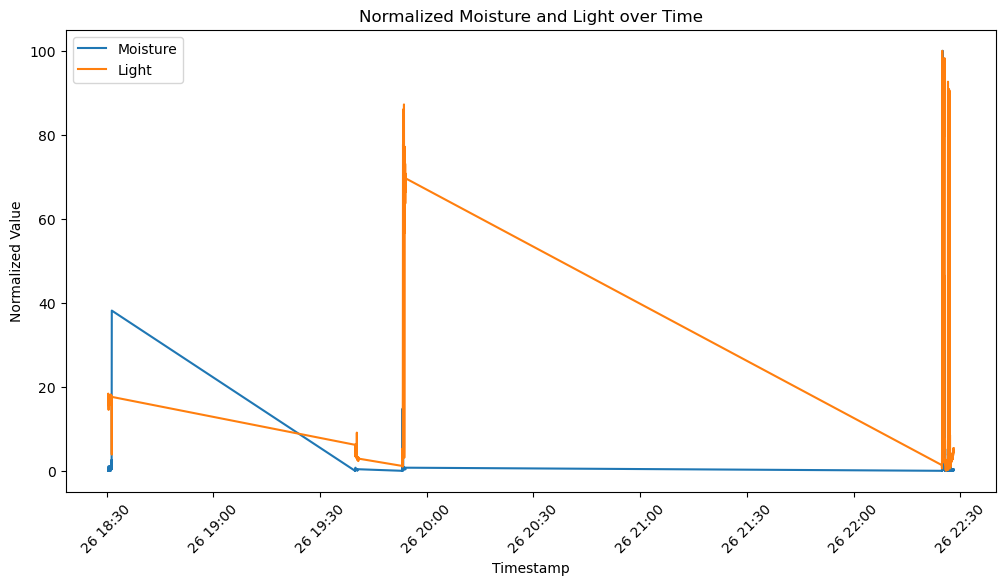

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Normalize 'moisture' and 'light' columns to a range of 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
df['moisture_normalized'] = scaler.fit_transform(df['moisture'].values.reshape(-1, 1))
df['light_normalized'] = scaler.fit_transform(df['light'].values.reshape(-1, 1))

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['moisture_normalized'], label='Moisture')
plt.plot(df['timestamp'], df['light_normalized'], label='Light')
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')
plt.title('Normalized Moisture and Light over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [26]:
import requests

# Get the latest entry from the dataframe
latest_entry = df.iloc[-1]

# Check if moisture value is lesser than 20
if latest_entry['moisture'] < 20:
    # Compose the message
    message = f"The moisture level is {latest_entry['moisture']} which is lesser than 20."

    # Send the message using FormsPree
    url = 'https://formspree.io/f/moqzzpql'
    payload = {
        'message': message,
        'email': 'your_email@example.com'  # Replace with your email
    }

    response = requests.post(url, data=payload)

    if response.status_code == 200:
        print("Message sent successfully.")
    else:
        print("Failed to send message.")
else:
    print("Moisture level is lesser than 20.")


Message sent successfully.


In [35]:
import requests

# Get the latest entry from the dataframe
latest_entry = df.iloc[-1]

# Check if light value is greater than 80
if latest_entry['light'] > 80:
    # Compose the message
    message = f"The light level is {latest_entry['light']} which is greater than 80."

    # Send the message using FormsPree
    url = 'https://formspree.io/f/xvonnvod'
    payload = {
        'message': message,
        'email': 'your_email@example.com'  # Replace with your email
    }

    response = requests.post(url, data=payload)

    if response.status_code == 200:
        print("Message sent successfully.")
    else:
        print("Failed to send message.")
else:
    print("Light level is not greater than 80.")


Light level is not greater than 80.


In [ ]:
from flask import Flask, render_template, request
import requests

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        # Get the form data
        moisture = int(request.form['moisture'])
        light = int(request.form['light'])
        
        # Check if moisture value is greater than 100
        if moisture > 100:
            # Compose the message
            message = f"The moisture level is {moisture} which is greater than 100."

            # Send the message using FormsPree
            url = 'https://formspree.io/f/moqzzpql'
            payload = {
                'message': message,
                'email': 'your_email@example.com'  # Replace with your email
            }

            response = requests.post(url, data=payload)

            if response.status_code == 200:
                result = "Message sent successfully."
            else:
                result = "Failed to send message."
        else:
            result = "Moisture level is not greater than 100."

        return render_template('index.html', result=result)
    else:
        return render_template('index.html')

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2023-05-27 12:46:12,070] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\Acer pc\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Acer pc\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Acer pc\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Acer pc\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\Acer pc\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Acer pc\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\A